# **GRU Exercise**

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error  

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [12]:
dataframe = pd.read_csv('Datasets/traffic.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

## Data Exploration



In [7]:
dataset

array([['2015-11-01 00:00:00', 1, 15, 20151101001],
       ['2015-11-01 01:00:00', 1, 13, 20151101011],
       ['2015-11-01 02:00:00', 1, 10, 20151101021],
       ...,
       ['2017-06-30 21:00:00', 4, 16, 20170630214],
       ['2017-06-30 22:00:00', 4, 22, 20170630224],
       ['2017-06-30 23:00:00', 4, 12, 20170630234]], dtype=object)

## Feature Engineering (if needed)



## Exploratory Data Analysis


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

## split into train and test sets

In [20]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 240  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [21]:


# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



c:\Users\zyadf\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting The Model



In [22]:
# Train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 99s 81ms/step - loss: 0.0021 - val_loss: 9.1429e-04
Epoch 2/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 104s 87ms/step - loss: 7.4097e-04 - val_loss: 8.6529e-04
Epoch 3/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 125s 104ms/step - loss: 7.0757e-04 - val_loss: 8.0550e-04
Epoch 4/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 133s 111ms/step - loss: 6.3827e-04 - val_loss: 7.5727e-04
Epoch 5/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 136s 113ms/step - loss: 6.0477e-04 - val_loss: 7.5564e-04
Epoch 6/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 134s 112ms/step - loss: 5.5706e-04 - val_loss: 7.4694e-04
Epoch 7/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 115s 96ms/step - loss: 5.1996e-04 - val_loss: 7.5186e-04
Epoch 8/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 108s 90ms/step - loss: 5.1786e-04 - val_loss: 7.4640e-04
Epoch 9/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 116s 97ms/step - loss: 4.9132e-04 - val_loss: 7.5807e-04
Epoch 10/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 120s 100ms/step - loss: 5.4758e-04 - val_loss: 7.4981e-04


## Make preductuion and evaluatuin matrix.

In [23]:
predicted_Vehicles= model.predict(X_test)


300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


## Visualize the result

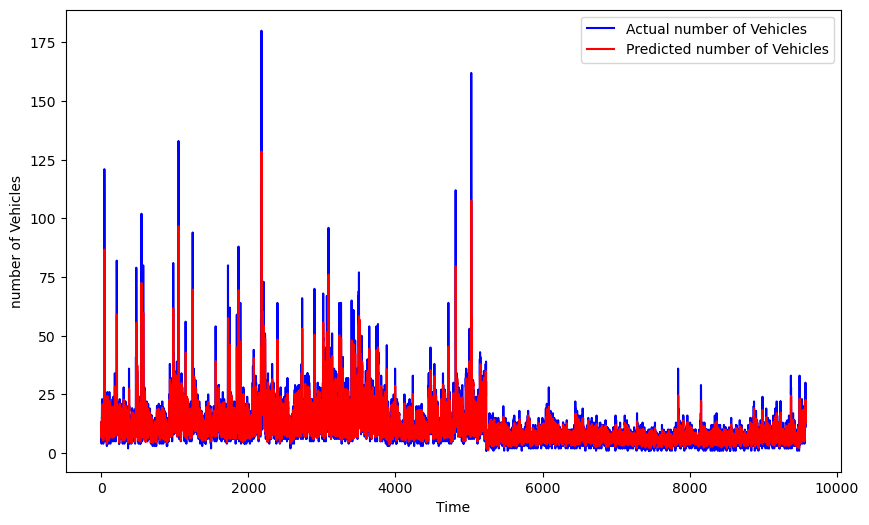

In [24]:
predicted_Vehicles = scaler.inverse_transform(predicted_Vehicles.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual number of Vehicles')
plt.plot(predicted_Vehicles, color='red', label='Predicted number of Vehicles')
plt.xlabel('Time')
plt.ylabel('number of Vehicles')
plt.legend()
plt.show()

# **Well done** :)